In [ ]:
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates


In [41]:
PROJECT_DIR = Path.cwd()
DATA_DIR = os.path.join(PROJECT_DIR, 'data')
OUT_DIR = os.path.join(PROJECT_DIR, 'output')
for d in [DATA_DIR, OUT_DIR]:
    os.makedirs(d, exist_ok=True)

In [21]:
lstm = pd.read_csv("results_lstm.csv", index_col=0)

enet = pd.read_csv("results_elasticnet.csv", index_col=0)

xgb = pd.read_csv("results_xgboost.csv", index_col=0)

In [22]:
lstm

,Pred_Log,True_Log,Pred_Vol,True_Vol
2009-03-27,-4.183661,-3.752233,0.015243,0.023465
2009-03-30,-4.160316,-4.040791,0.015603,0.017584
2009-03-31,-4.055651,-3.812379,0.017324,0.022096
2009-04-01,-4.123008,-3.722610,0.016196,0.024171
2009-04-02,-4.142137,-4.175435,0.015889,0.015368
...,...,...,...,...
2021-02-09,-5.286337,-4.729817,0.005060,0.008828
2021-02-10,-5.281930,-5.027483,0.005083,0.006555
2021-02-11,-5.104016,-5.570071,0.006072,0.003810
2021-02-12,-5.077072,-5.036132,0.006238,0.006499


In [23]:
#Keep onlyy the collumn Pred_Vol and True_Vol in the lstm dataframe:
lstm = lstm[["Pred_Vol", "True_Vol"]]

In [25]:
#Keep only the ElasssticNet_Vol collumn in enet dataframe:
enet = enet[["ElasticNet_Vol"]]

In [26]:
#Keep only the Pred_Vol collumn in the xgb dataframe:
xgb = xgb[["Pred_Vol"]]


In [29]:
lstm

,Pred_Vol,True_Vol
2009-03-27,0.015243,0.023465
2009-03-30,0.015603,0.017584
2009-03-31,0.017324,0.022096
2009-04-01,0.016196,0.024171
2009-04-02,0.015889,0.015368
...,...,...
2021-02-09,0.005060,0.008828
2021-02-10,0.005083,0.006555
2021-02-11,0.006072,0.003810
2021-02-12,0.006238,0.006499


In [30]:
xgb

,Pred_Vol
2009-03-27,0.017984
2009-03-30,0.023856
2009-03-31,0.016180
2009-04-01,0.018270
2009-04-02,0.019141
...,...
2021-02-09,0.005128
2021-02-10,0.006927
2021-02-11,0.005818
2021-02-12,0.005008


In [31]:
enet

,ElasticNet_Vol
2009-03-27,0.016127
2009-03-30,0.021463
2009-03-31,0.017586
2009-04-01,0.016967
2009-04-02,0.018934
...,...
2021-02-09,0.004944
2021-02-10,0.006652
2021-02-11,0.005952
2021-02-12,0.005063


In [33]:
# Rename columns so they do not conflict
lstm_ren  = lstm.rename(columns={'Pred_Vol': 'LSTM_Vol'})
xgb_ren   = xgb.rename(columns={'Pred_Vol': 'XGB_Vol'})
enet_ren  = enet.rename(columns={'ElasticNet_Vol': 'ENet_Vol'})

# Merge everything on the index
merged_df = pd.concat([lstm_ren, xgb_ren, enet_ren], axis=1)

# Display result
merged_df.head()


,LSTM_Vol,True_Vol,XGB_Vol,ENet_Vol
2009-03-27,0.015243,0.023465,0.017984,0.016127
2009-03-30,0.015603,0.017584,0.023856,0.021463
2009-03-31,0.017324,0.022096,0.016180,0.017586
2009-04-01,0.016196,0.024171,0.018270,0.016967
2009-04-02,0.015889,0.015368,0.019141,0.018934


In [34]:
merged_df

,LSTM_Vol,True_Vol,XGB_Vol,ENet_Vol
2009-03-27,0.015243,0.023465,0.017984,0.016127
2009-03-30,0.015603,0.017584,0.023856,0.021463
2009-03-31,0.017324,0.022096,0.016180,0.017586
2009-04-01,0.016196,0.024171,0.018270,0.016967
2009-04-02,0.015889,0.015368,0.019141,0.018934
...,...,...,...,...
2021-02-09,0.005060,0.008828,0.005128,0.004944
2021-02-10,0.005083,0.006555,0.006927,0.006652
2021-02-11,0.006072,0.003810,0.005818,0.005952
2021-02-12,0.006238,0.006499,0.005008,0.005063


In [47]:
merged_df

,LSTM_Vol,True_Vol,XGB_Vol,ENet_Vol
2009-03-27,0.015243,0.023465,0.017984,0.016127
2009-03-30,0.015603,0.017584,0.023856,0.021463
2009-03-31,0.017324,0.022096,0.016180,0.017586
2009-04-01,0.016196,0.024171,0.018270,0.016967
2009-04-02,0.015889,0.015368,0.019141,0.018934
...,...,...,...,...
2021-02-09,0.005060,0.008828,0.005128,0.004944
2021-02-10,0.005083,0.006555,0.006927,0.006652
2021-02-11,0.006072,0.003810,0.005818,0.005952
2021-02-12,0.006238,0.006499,0.005008,0.005063


Graph successfully saved to: c:\Etudes\EPFL\2eme\MA3\Advanced data analysis (UNIL)\Capstone Project\Code\output\enet_xgb_forecast_comparison.pdf


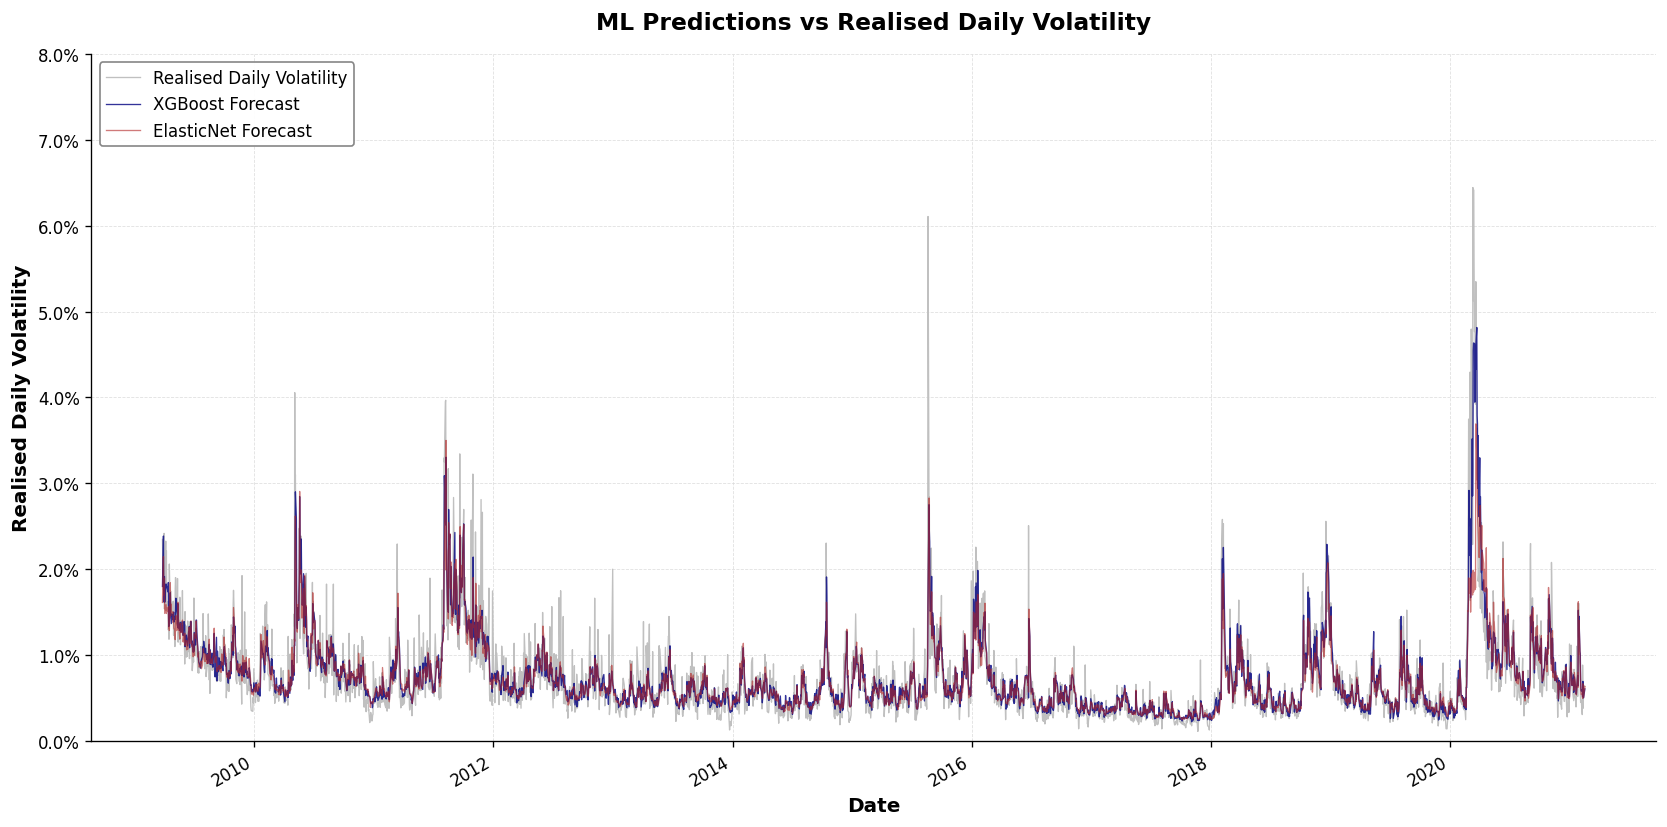

In [ ]:

plt.style.use('default')

# 2. Ensure the index is time-based (fix potential date bug)
if not isinstance(merged_df.index, pd.DatetimeIndex):
    merged_df.index = pd.to_datetime(merged_df.index)

plot_dates = merged_df.index

# Data preparation (%)
true_pct  = merged_df['True_Vol']   * 100
enet_pct  = merged_df['ENet_Vol']   * 100
xgb_pct   = merged_df['XGB_Vol']    * 100
lstm_pct  = merged_df['LSTM_Vol']   * 100

# Create the figure
fig, ax = plt.subplots(figsize=(14, 7), dpi=120)
fig.patch.set_facecolor('white')  # White background around the plot
ax.set_facecolor('white')         # White background inside the plot

# --- PLOTS ---
# 1. Realised volatility (light grey, background series)
ax.plot(
    plot_dates, true_pct,
    color='silver', linewidth=0.8, alpha=1.0,
    label='Realised Daily Volatility'
)

# 3. XGBoost (navy blue)
ax.plot(
    plot_dates, xgb_pct,
    color='navy', linewidth=0.8, alpha=0.8,
    label='XGBoost Forecast'
)

# 2. ElasticNet (brick red)
ax.plot(
    plot_dates, enet_pct,
    color='firebrick', linewidth=0.8, alpha=0.6,
    label='ElasticNet Forecast'
)

# --- STYLING (same as EGARCH) ---
ax.set_title(
    'ML Predictions vs Realised Daily Volatility',
    fontsize=14, fontweight='bold', pad=15
)
ax.set_ylabel('Realised Daily Volatility', fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')

# Light grid
ax.grid(
    True, which='major', color='#d9d9d9',
    linestyle='--', linewidth=0.5, alpha=0.8
)

# Y-axis formatting (percentage)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
ax.set_ylim(0, 8)  # 0–8% range

# X-axis formatting (clean dates)
# Display one tick every two years to avoid clutter
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()  # Rotate dates if needed

# Remove unnecessary spines (top and right)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

# Clean legend
plt.legend(
    frameon=True, fontsize=10, loc='upper left',
    framealpha=0.95, facecolor='white', edgecolor='grey'
)

plt.tight_layout()

try:
    save_path = os.path.join(OUT_DIR, "enet_xgb_forecast_comparison.pdf")
    plt.savefig(save_path, format="pdf", bbox_inches="tight")
    print(f"Graph successfully saved to: {save_path}")
except Exception as e:
    print(f"Could not save PDF (check OUT_DIR): {e}")

plt.show()


Graph successfully saved to: c:\Etudes\EPFL\2eme\MA3\Advanced data analysis (UNIL)\Capstone Project\Code\output\LSTM_forecast_comparison.pdf


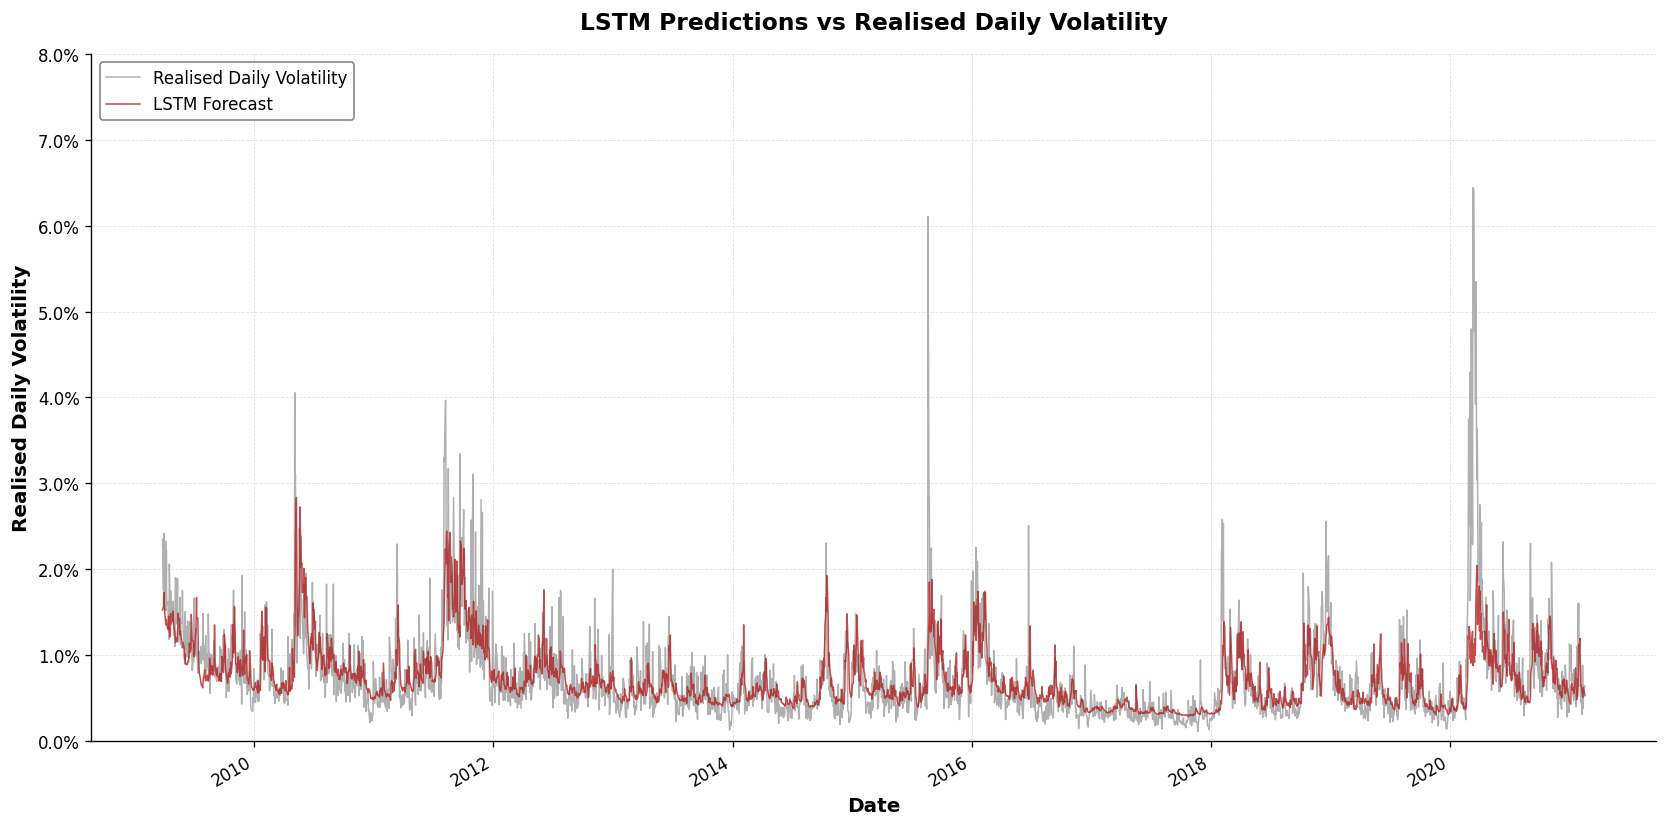

In [ ]:

plt.style.use('default')

# 2. Ensure the index is time-based
if not isinstance(merged_df.index, pd.DatetimeIndex):
    merged_df.index = pd.to_datetime(merged_df.index)

plot_dates = merged_df.index

# Data preparation (%)
lstm_pct = merged_df['LSTM_Vol'] * 100

# Create the figure
fig, ax = plt.subplots(figsize=(14, 7), dpi=120)
fig.patch.set_facecolor('white')  # White background around the plot
ax.set_facecolor('white')         # White background inside the plot

# --- PLOTS ---
# 1. Realised volatility (light grey, background series)
ax.plot(
    plot_dates, true_pct,
    color='#B0B0B0', linewidth=0.9, alpha=1,
    label='Realised Daily Volatility'
)

# 4. LSTM (dark green)
ax.plot(
    plot_dates, lstm_pct,
    color='firebrick', linewidth=0.9, alpha=0.8,
    label='LSTM Forecast'
)

# --- STYLING (same as EGARCH) ---
ax.set_title(
    'LSTM Predictions vs Realised Daily Volatility',
    fontsize=14, fontweight='bold', pad=15
)
ax.set_ylabel('Realised Daily Volatility', fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')

# Light grid
ax.grid(
    True, which='major', color='#d9d9d9',
    linestyle='--', linewidth=0.5, alpha=0.8
)

# Y-axis formatting (percentage)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
ax.set_ylim(0, 8)  # 0–8% range

# --- X-AXIS FORMATTING (MODIFICATION IS HERE) ---
# Display one tick every 2 years
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()  # Rotate dates to avoid overlap

# Remove unnecessary spines (top and right)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

# Clean legend
plt.legend(
    frameon=True, fontsize=10, loc='upper left',
    framealpha=0.95, facecolor='white', edgecolor='grey'
)

plt.tight_layout()

try:
    save_path = os.path.join(OUT_DIR, "LSTM_forecast_comparison.pdf")
    plt.savefig(save_path, format="pdf", bbox_inches="tight")
    print(f"Graph successfully saved to: {save_path}")
except Exception as e:
    print(f"Could not save PDF (check OUT_DIR): {e}")

plt.show()
